### DRUG TARGET BINDING SCORE

In [1]:
!pip install DeepPurpose

     ---------------------------------------- 0.0/158.5 kB ? eta -:--:--
     ------- -------------------------------- 30.7/158.5 kB ? eta -:--:--
     --------------- ----------------------- 61.4/158.5 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ - 153.6/158.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 158.5/158.5 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for subword-nmt from https://files.pythonhosted.org/packages/1b/9a/488ecac22d78eb429928b9ee4f6b6c692e116ca4bd43ef42a475698def32/subword_nmt-0.3.8-py3-none-any.whl.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.66.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.23.4 which is incompatible.


In [3]:
pip install git+https://github.com/bp-kelley/descriptastorus

  Cloning https://github.com/bp-kelley/descriptastorus to c:\users\ssanj\appdata\local\temp\pip-req-build-2pod1p9u
  Resolved https://github.com/bp-kelley/descriptastorus to commit 3f7626ecdc7582df5a148600aa683e4bd768d216
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for descriptastorus: filename=descriptastorus-2.7.0-py3-none-any.whl size=1084331 sha256=8f2ae7b506d1f885c37a394cb70f7996794c5a5e882e2a24bc7c046dea33d1f6
  Stored in directory: C:\Users\ssanj\AppData\Local\Temp\pip-ephem-wheel-cache-h82sic_k\wheels\a5\37\b0\bc8b04ad2a1d1f3e17a7bff134d2a7e63621914e0a01d983a6
Successfully built descriptastorus
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus 'C:\Users\ssanj\AppData\Local\Temp\pip-req-build-2pod1p9u'


In [4]:
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")

In [7]:
drug_encoding, target_encoding = 'MPNN', 'CNN'
#drug_encoding, target_encoding = 'Morgan', 'Conjoint_triad'

In [17]:
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2],
                                random_seed = 1)
train.head(5)

Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.365,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[M, K, K, F, F, D, S, R, R, E, Q, G, G, S, G, ..."


(**Model configuration generation**) Now, we initialize a model with its configuration. You can modify almost any hyper-parameters (e.g., learning rate, epoch, batch size), model parameters (e.g. hidden dimensions, filter size) and etc in this function. The supported configurations are listed here in this [link](https://github.com/kexinhuang12345/DeepPurpose/blob/e169e2f550694145077bb2af95a4031abe400a77/DeepPurpose/utils.py#L486).

For the sake of example, we specify the epoch size to be 5, and set the model parameters to be small so that you can run on both CPUs & GPUs quickly and can proceed to the next steps. For a reference parameters, checkout the notebooks in the DEMO folder.

In [9]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 5, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )

(**Model initialization**) Next, we initialize a model using the above configuration.

In [10]:
model = models.model_initialize(**config)
model

(**Model Training**) Next, it is ready to train, using the ```model.train``` function! If you do not have test set, you can just use ```model.train(train, val)```. 

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 31.2962. Total time 0.00111 hours
Training at Epoch 1 iteration 100 with loss 0.84239. Total time 0.10222 hours
Validation at Epoch 1 with loss:0.46824, MSE: 0.76227 , Pearson Correlation: 0.26593 with p-value: 7.79E-50 , Concordance Index: 0.62388
Training at Epoch 2 iteration 0 with loss 0.78903. Total time 0.15777 hours
Training at Epoch 2 iteration 100 with loss 0.80069. Total time 0.20638 hours
Validation at Epoch 2 with loss:0.87315, MSE: 0.72741 , Pearson Correlation: 0.36730 with p-value: 1.16E-96 , Concordance Index: 0.69293
Training at Epoch 3 iteration 0 with loss 0.82976. Total time 0.24194 hours
Training at Epoch 3 iteration 100 with loss 0.81090. Total time 0.28833 hours
Validation at Epoch 3 with loss:0.48035, MSE: 0.69970 , Pearson Correlation: 0.37770 with p-value: 1.51E-102 , Concordance Index: 0.70365
Training at Epoch 4 iteration 0 with loss 0.83206. Total tim

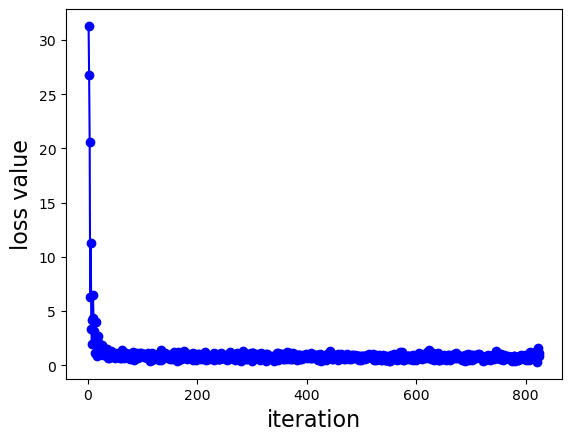

In [11]:
model.train(train, val, test)

We see that the model will automatically generate and plot the training process, along with the validation result and test result.

(**Model Prediction and Repuposing/Screening**) Next, we see how we can predict affinity scores on new data. Suppose the new data is a drug-target pair below.

In [15]:
X_drug = ['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N']
X_target = ['MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL']
y = [7.365]
X_pred = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')
y_pred = model.predict(X_pred)
print('The predicted score is ' + str(y_pred))

Drug Target Interaction Prediction Mode...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
do not do train/test split on the data for already splitted data
predicting...
The predicted score is [5.705260276794434]


In [18]:
import pickle

# Save the model as a pickle file
with open('binding_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'binding_model.pkl'.")


Model saved as 'binding_model.pkl'.
